# Prop hang plots

Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Load data and view

In [2]:
# Load the dataset
df = pd.read_csv('../chap_6_data/wind/episode_states_no_wind_knife.csv')

# Get basic information about the dataset
data_info = df.info()

# Display the first 5 rows of the dataset
data_head = df.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13672 entries, 0 to 13671
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   episode   13672 non-null  float64
 1   time      13672 non-null  float64
 2   x         13672 non-null  float64
 3   y         13672 non-null  float64
 4   z         13672 non-null  float64
 5   roll      13672 non-null  float64
 6   pitch     13672 non-null  float64
 7   yaw       13672 non-null  float64
 8   u         13672 non-null  float64
 9   v         13672 non-null  float64
 10  w         13672 non-null  float64
 11  p         13672 non-null  float64
 12  q         13672 non-null  float64
 13  r         13672 non-null  float64
 14  airspeed  13672 non-null  float64
 15  action_1  13672 non-null  float64
 16  action_2  13672 non-null  float64
 17  action_3  13672 non-null  float64
 18  throttle  13672 non-null  float64
dtypes: float64(19)
memory usage: 2.0 MB


(None,
    episode      time         x         y         z      roll     pitch  \
 0      1.0  0.000000  0.000000  0.000000  0.000000 -0.031531  0.034804   
 1      1.0  0.050071  0.683518  0.001058  0.000000 -0.014857  0.031816   
 2      1.0  0.100148  1.470740 -0.003040  0.000000  0.076060  0.012756   
 3      1.0  0.160455  2.279701 -0.002378  0.000000  0.107826 -0.016095   
 4      1.0  0.215513  3.283239 -0.005553  0.020004  0.094089 -0.113026   
 
         yaw          u         v         w         p         q         r  \
 0 -0.215684  16.227411 -0.056382  0.571157 -0.007007  0.000013 -0.007844   
 1 -0.215864  16.219428 -0.049056  0.521621  0.478842 -0.082932 -0.003053   
 2 -0.217987  16.165125  0.005205  0.205389  1.956741 -0.434668 -0.043051   
 3 -0.227763  16.074667  0.155863 -0.128368 -0.109917 -0.507340 -0.107630   
 4 -0.258216  15.922512  0.542510 -1.410955  0.087931 -2.265752 -0.494453   
 
     airspeed    action_1    action_2   action_3   throttle  
 0  15.323120  

In [3]:

# Extract unique episodes
episodes = df['episode'].unique()

# plt.figure(figsize=(15, 8))

# # Plot x and z for each episode
# for episode in episodes:
#     df_episode = df[df['episode'] == episode]
#     plt.plot(df_episode['x'], df_episode['z'], label=f'Episode {int(episode)}')

# plt.xlabel('X Position')
# plt.ylabel('Z Position')
# plt.title('X and Z Positions for Each Episode')
# plt.legend(loc='best')
# plt.grid(True)
# plt.show()


/tmp/ipykernel_3638954/2442127937.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')
/tmp/ipykernel_3638954/2442127937.py:25: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Episode number')


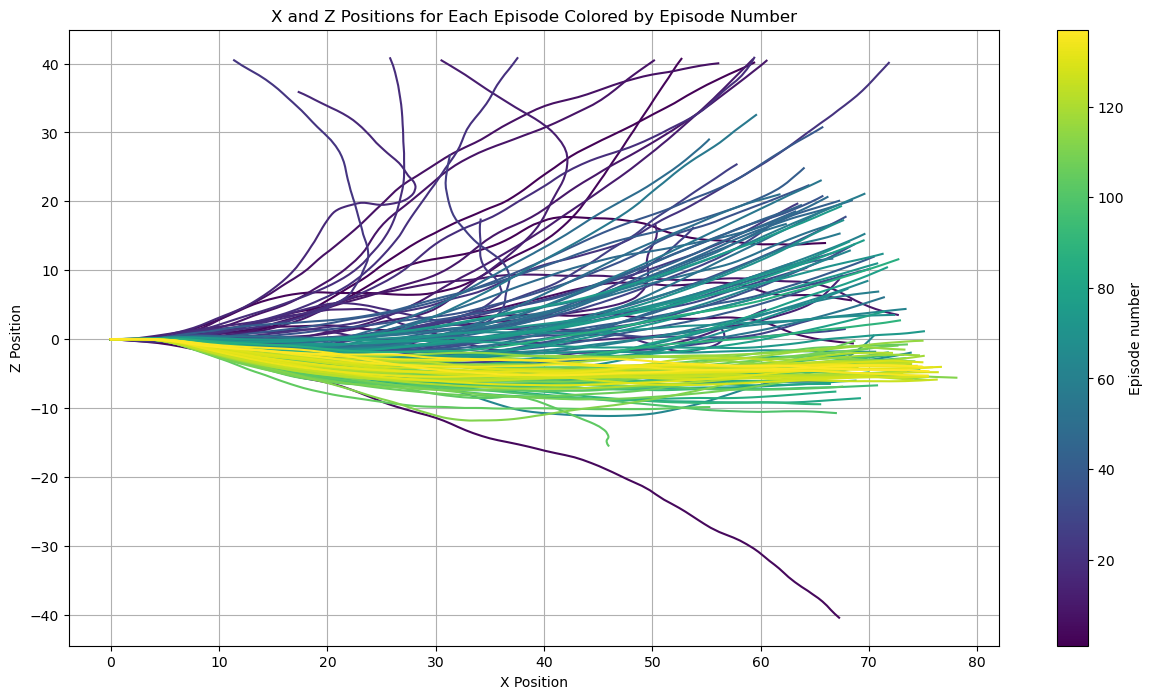

In [4]:
from matplotlib import cm
from matplotlib.colors import Normalize

# Normalize the episodes to [0, 1] range
norm = Normalize(vmin=min(episodes), vmax=max(episodes))

# Create a colormap
cmap = cm.get_cmap('viridis')

plt.figure(figsize=(15, 8))

# Plot x and z for each episode with color depending on the episode number
for episode in episodes:
    df_episode = df[df['episode'] == episode]
    plt.plot(df_episode['x'], df_episode['z'], color=cmap(norm(episode)))

plt.xlabel('X Position')
plt.ylabel('Z Position')
plt.title('X and Z Positions for Each Episode Colored by Episode Number')
plt.grid(True)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Episode number')

plt.show()


/tmp/ipykernel_3638954/2270412538.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Episode number')


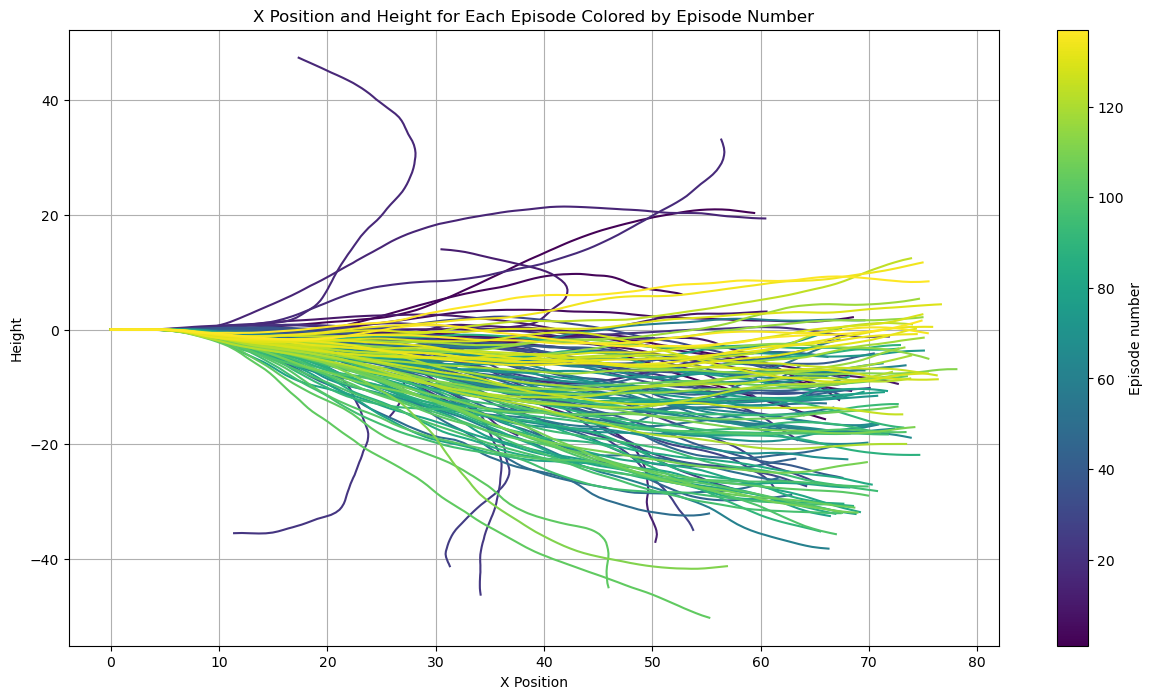

In [5]:
plt.figure(figsize=(15, 8))

# Plot x and height(-z) for each episode with color depending on the episode number
for episode in episodes:
    df_episode = df[df['episode'] == episode]
    plt.plot(df_episode['x'], -df_episode['y'], color=cmap(norm(episode)))

plt.xlabel('X Position')
plt.ylabel('Height')
plt.title('X Position and Height for Each Episode Colored by Episode Number')
plt.grid(True)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Episode number')

plt.show()


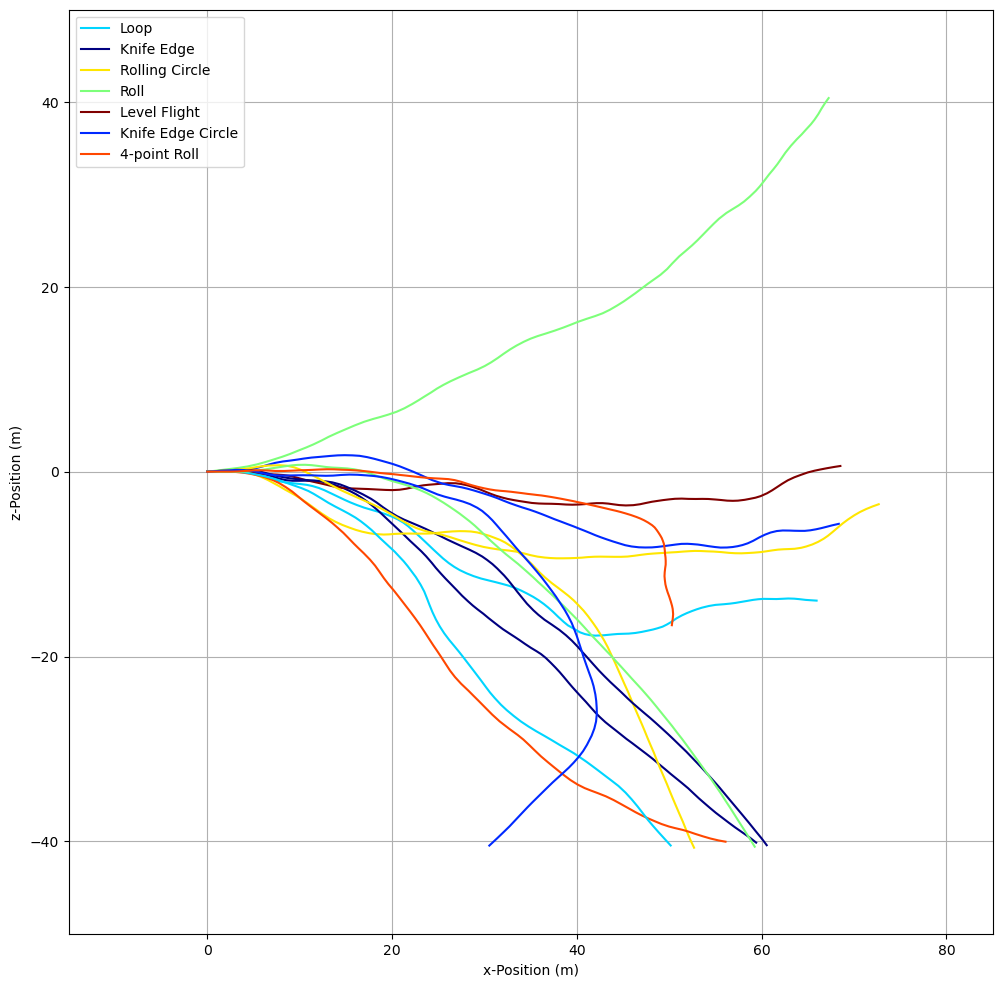

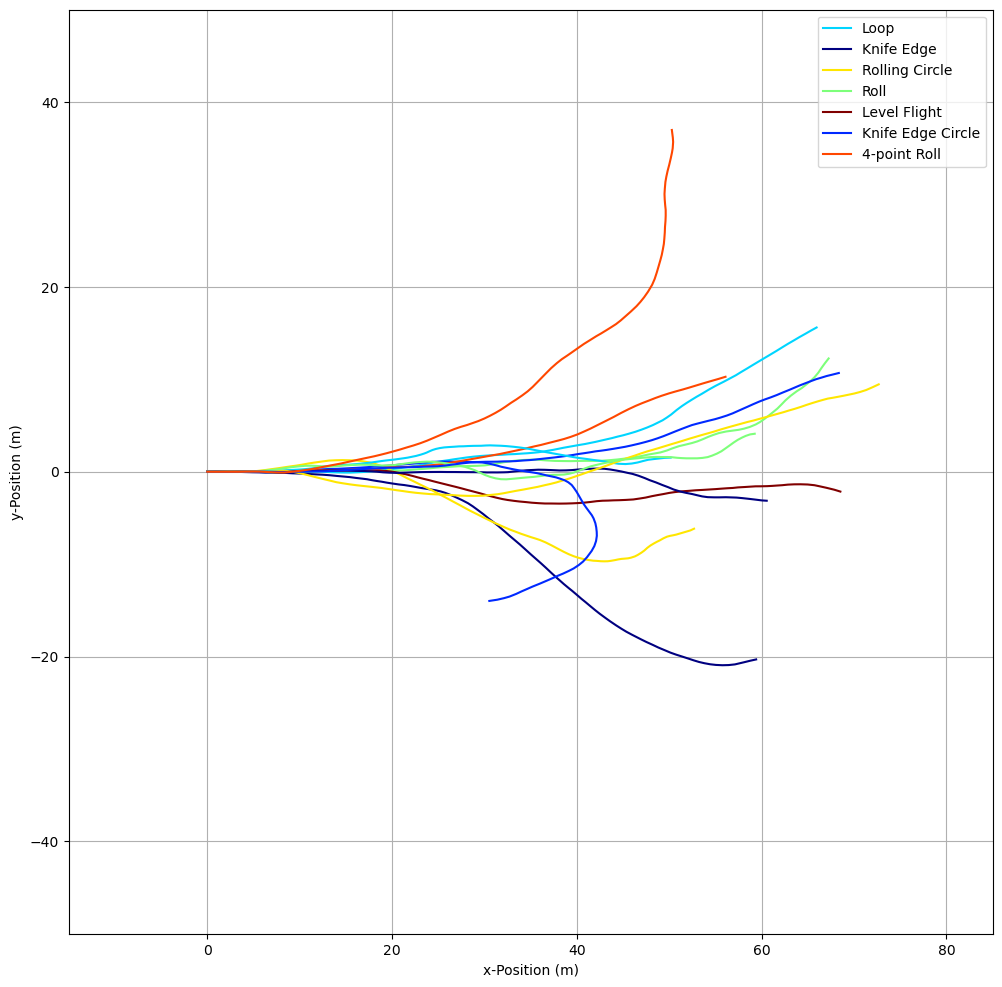

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [6]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data
# file_path = '/path/to/your/csv/file.csv'  # Replace with your file path
# data = pd.read_csv(file_path)
data = df

# Dictionary mapping episode numbers to maneuvers
episode_legends = {
    1: 'Loop',
    2: 'Knife Edge',
    3: 'Rolling Circle',
    4: 'Roll',
    5: 'Level Flight',
    6: 'Knife Edge Circle',
    7: '4-point Roll',
    8: 'Loop',
    9: 'Knife Edge',
    10: 'Rolling Circle',
    11: 'Roll',
    12: 'Knife Edge Circle',
    13: '4-point Roll'
}

# Generate unique colors for each unique maneuver
unique_maneuvers = list(set(episode_legends.values()))
colors = plt.cm.jet(np.linspace(0, 1, len(unique_maneuvers)))
color_map = {maneuver: color for maneuver, color in zip(unique_maneuvers, colors)}

# First 2D Plot (X-Z coordinates) with true equal axis scaling
fig_xz_true_equal = plt.figure(figsize=(24, 12))
ax_xz_true_equal = fig_xz_true_equal.add_subplot(111, aspect='equal')

# Second 2D Plot (X-Y coordinates) with true equal axis scaling
fig_xy_true_equal = plt.figure(figsize=(24, 12))
ax_xy_true_equal = fig_xy_true_equal.add_subplot(111, aspect='equal')

# Create legend handles for non-duplicate entries
legend_handles_2d_true_equal = []

# Plot each episode with a distinct color based on the maneuver
for episode, maneuver in episode_legends.items():
    episode_data = data[data['episode'] == episode]
    line_xz_true_equal = ax_xz_true_equal.plot(episode_data['x'], -episode_data['z'], label=maneuver, color=color_map[maneuver])
    line_xy_true_equal = ax_xy_true_equal.plot(episode_data['x'], episode_data['y'], label=maneuver, color=color_map[maneuver])
    
    if maneuver not in [handle.get_label() for handle in legend_handles_2d_true_equal]:
        legend_handles_2d_true_equal.append(line_xz_true_equal[0])

# Set labels for the axes in the X-Z plot
ax_xz_true_equal.set_xlabel('x-Position (m)')
ax_xz_true_equal.set_ylabel('z-Position (m)')
# Set the title of the X-Z plot
# ax_xz_true_equal.set_title('2D Plot (X-Z Plane) - True Equal Axis Scaling')

# Set labels for the axes in the X-Y plot
ax_xy_true_equal.set_xlabel('x-Position (m)')
ax_xy_true_equal.set_ylabel('y-Position (m)')
# Set the title of the X-Y plot
# ax_xy_true_equal.set_title('2D Plot (X-Y Plane) - True Equal Axis Scaling')

ax_xz_true_equal.set_xlim([-15, 85])

ax_xz_true_equal.set_ylim([-50, 50])



ax_xy_true_equal.set_xlim([-15, 85])
# add grid
ax_xz_true_equal.grid()
ax_xy_true_equal.grid()

ax_xy_true_equal.set_ylim([-50, 50])


# Add a legend to differentiate the maneuvers, without duplicate entries, for both plots
ax_xz_true_equal.legend(handles=legend_handles_2d_true_equal)
ax_xy_true_equal.legend(handles=legend_handles_2d_true_equal)

# Display the updated 2D plots with true equal axes
plt.show()

# save the figures as eps
fig_xz_true_equal.savefig('fig_xz_true_equal.eps', format='eps')
fig_xy_true_equal.savefig('fig_xy_true_equal.eps', format='eps')


In [7]:
# # Create 2D plots with equal scales along the axes

# # First 2D Plot (X-Z coordinates)
# fig_xz = plt.figure(figsize=(12, 6))
# ax_xz = fig_xz.add_subplot(111)

# # Second 2D Plot (X-Y coordinates)
# fig_xy = plt.figure(figsize=(12, 6))
# ax_xy = fig_xy.add_subplot(111)

# # Create legend handles for non-duplicate entries
# legend_handles_2d = []

# # Plot each episode with a distinct color based on the maneuver
# for episode, maneuver in episode_legends.items():
#     episode_data = first_13_episodes[first_13_episodes['episode'] == episode]
#     line_xz = ax_xz.plot(episode_data['x'], episode_data['z'], label=maneuver, color=color_map[maneuver])
#     line_xy = ax_xy.plot(episode_data['x'], episode_data['y'], label=maneuver, color=color_map[maneuver])
    
#     if maneuver not in [handle.get_label() for handle in legend_handles_2d]:
#         legend_handles_2d.append(line_xz[0])

# # Set labels for the axes in the X-Z plot
# ax_xz.set_xlabel('X')
# ax_xz.set_ylabel('Z')
# # Set the title of the X-Z plot
# ax_xz.set_title('2D Plot (X-Z Plane)')

# # Set labels for the axes in the X-Y plot
# ax_xy.set_xlabel('X')
# ax_xy.set_ylabel('Y')
# # Set the title of the X-Y plot
# ax_xy.set_title('2D Plot (X-Y Plane)')

# # Add a legend to differentiate the maneuvers, without duplicate entries, for both plots
# ax_xz.legend(handles=legend_handles_2d)
# ax_xy.legend(handles=legend_handles_2d)

# # Display the updated 2D plots
# plt.show()


/tmp/ipykernel_3638954/3873242151.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')
/tmp/ipykernel_3638954/3873242151.py:61: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Episode number')


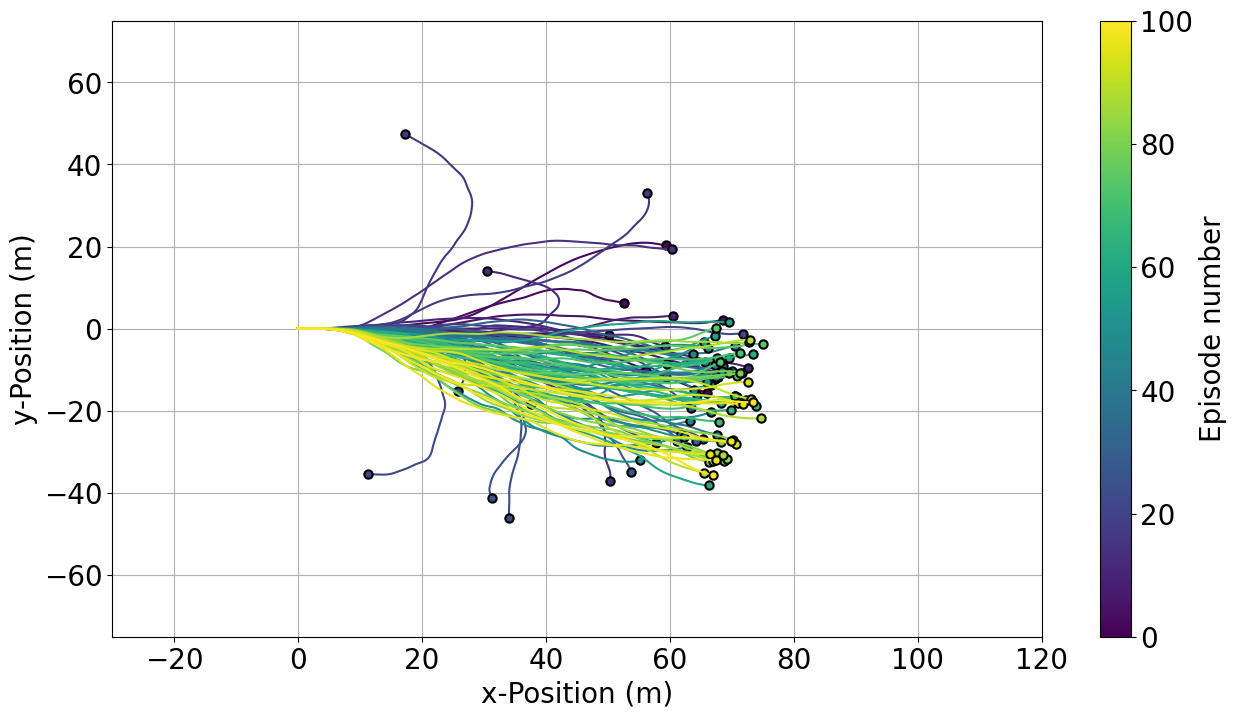

In [15]:
fig, ax = plt.subplots(figsize=(15, 8))

episode_legends = {
    0: 'Loop',
    1: 'Knife edge',
    2: 'Rolling circle',
    3: 'Axial roll',
    4: 'Level flight',
    5: 'Knife edge circle',
    6: '4-point roll',
    7: 'Loop',
    8: 'Knife edge',
    9: 'Rolling circle',
    10: 'Axial roll',
    11: 'Level flight',
    12: 'Knife edge circle',
    13: '4-point roll'
}

unique_legends = list(set(episode_legends.values()))

# Plot x and height(-z) for each episode with color depending on the episode number
for idx, episode in enumerate(episodes):

    # break if episode is greater than 100
    # if episode <13:
    #     continue
    if episode > 100:
        break

    df_episode = df[df['episode'] == episode]



    # if x position is less than -50, skip the episode
    if df_episode['x'].iloc[-1] < -50:
        continue
    # continie if episode time greater than 10 seconds
    if df_episode['time'].iloc[-1] > 10:
        continue

    plt.plot(df_episode['x'], -df_episode['y'], color=cmap(norm(episode)))
    
    # Mark the end point of the episode with a smaller filled circle marker and black edge color
    plt.plot(df_episode['x'].iloc[-1], -df_episode['y'].iloc[-1], 'o', color=cmap(norm(episode)), markersize=6, markeredgecolor='black', markeredgewidth=1.5)

 # limit norm to first 100 episodes

norm = Normalize(vmin=0, vmax=100)
cmap = cm.get_cmap('viridis')
plt.xlabel('x-Position (m)')
plt.ylabel('y-Position (m)')
# increase font size
plt.rcParams.update({'font.size': 20})
# plt.title('X Position and Height for Each Episode Colored by Episode Number')
plt.grid(True)

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Episode number')

# set axis limits
plt.xlim(-30, 120)
plt.ylim(-75, 75)

plt.show()
# save figure as eps
fig.savefig('knife_edge_xy_nowind.eps', format='eps')

In [9]:
# print all y values in dataframe

for episode, df_episode in df.groupby('episode'):
    print(episode)
    print(df_episode['y'])

1.0
0       0.000000
1       0.001058
2      -0.003040
3      -0.002378
4      -0.005553
         ...    
96     14.233880
97     14.557622
98     14.938939
99     15.269830
100    15.610248
Name: y, Length: 101, dtype: float64
2.0
101     0.000000
102    -0.009756
103    -0.017448
104    -0.018480
105    -0.019949
         ...    
192   -20.924112
193   -20.851890
194   -20.617786
195   -20.456480
196   -20.314421
Name: y, Length: 96, dtype: float64
3.0
197    0.000000
198   -0.001805
199   -0.003400
200    0.000780
201    0.008595
         ...   
285   -6.704054
286   -6.595113
287   -6.490879
288   -6.354245
289   -6.164911
Name: y, Length: 93, dtype: float64
4.0
290     0.000000
291    -0.015173
292    -0.000288
293    -0.000143
294    -0.007706
         ...    
378    10.219886
379    10.715532
380    11.218789
381    11.756466
382    12.258143
Name: y, Length: 93, dtype: float64
5.0
383    0.000000
384    0.012456
385    0.001453
386    0.001649
387   -0.004596
         ...   
47

/tmp/ipykernel_3638954/4009517784.py:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab10', len(unique_legends))


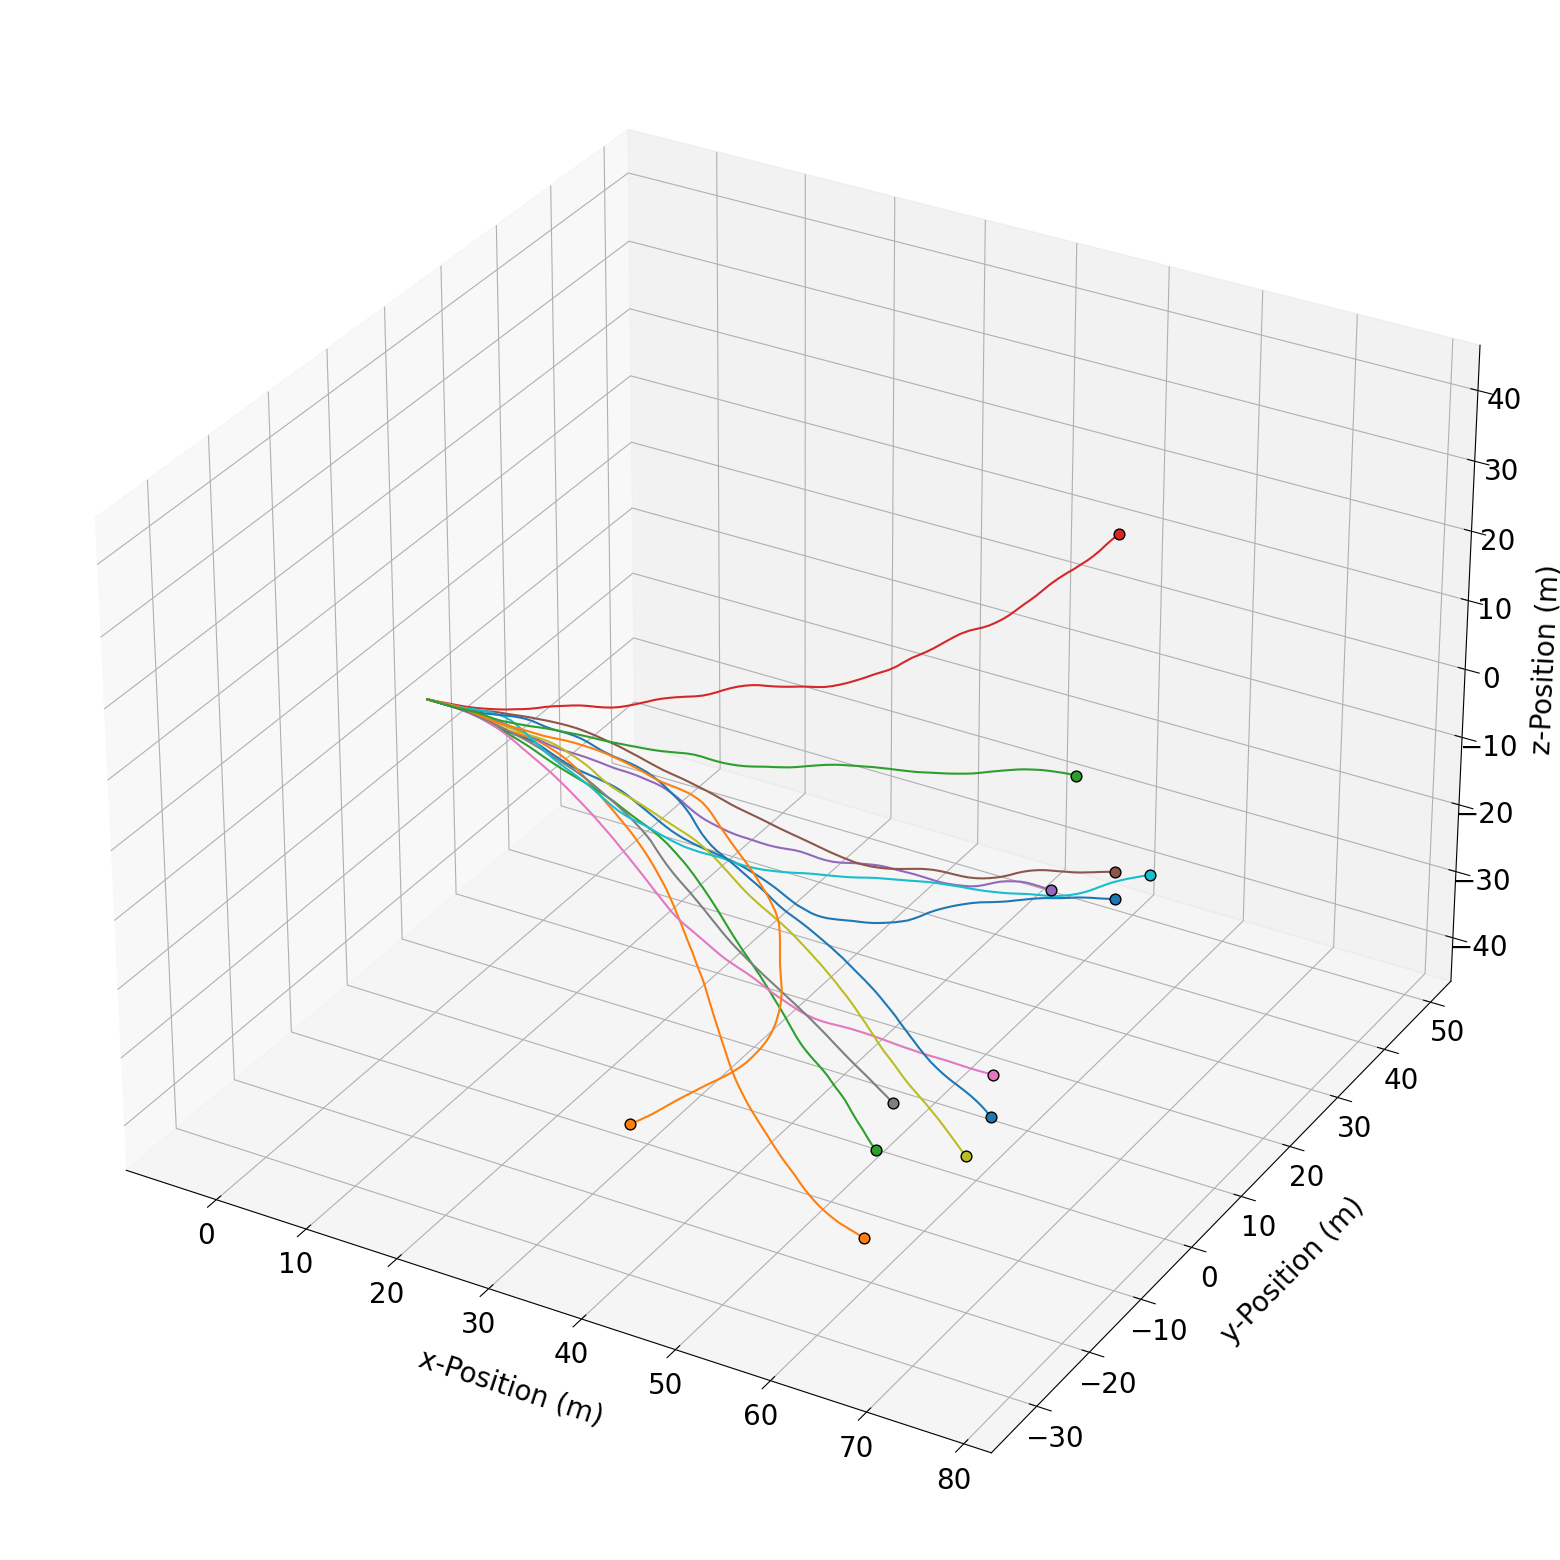

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm

# Sample data
# df = pd.DataFrame(...)
# episodes = [1,2,...]

def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale'''
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box will be made equal to the largest axis' bounding box
    largest_range = max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - largest_range / 2, x_middle + largest_range / 2])
    ax.set_ylim3d([y_middle - largest_range / 2, y_middle + largest_range / 2])
    ax.set_zlim3d([z_middle - largest_range / 2, z_middle + largest_range / 2])


episode_legends = {
    1: 'Loop',
    2: 'Knife edge',
    3: 'Rolling circle',
    4: 'Axial roll',
    5: 'Level flight',
    6: 'Knife edge circle',
    7: '4-point roll',
    8: 'Loop',
    9: 'Knife edge',
    10: 'Rolling circle',
    11: 'Axial roll',
    12: 'Knife edge circle',
    13: '4-point roll'
}

# Generate unique colors for each unique legend using the 'tab10' colormap
unique_legends = list(set(episode_legends.values()))
cmap = cm.get_cmap('tab10', len(unique_legends))
color_mapping = {legend: cmap(i) for i, legend in enumerate(unique_legends)}

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')  # 3D axis

already_plotted_legends = set()

for episode, df_episode in df.groupby('episode'):
    if episode > 13:
        break
    # if episode > 50:
    #     break

    if df_episode['x'].iloc[-1] < -50:
        continue

    legend_name = episode_legends.get(episode, f"Episode {episode}")
    # episode_color = color_mapping[legend_name]

    label_for_legend = legend_name if legend_name not in already_plotted_legends else "_nolegend_"
    already_plotted_legends.add(legend_name)

    # Use ax.plot for plotting in 3D
    # ax.plot(df_episode['x'], df_episode['y'], -df_episode['z'], color=episode_color, label=label_for_legend)
    # ax.scatter(df_episode['x'].iloc[-1], df_episode['y'].iloc[-1], -df_episode['z'].iloc[-1], c=episode_color, s=60, edgecolor='black')

    ax.plot(df_episode['x'], df_episode['y'], -df_episode['z'], label=label_for_legend)
    ax.scatter(df_episode['x'].iloc[-1], df_episode['y'].iloc[-1], -df_episode['z'].iloc[-1], s=60, edgecolor='black')


ax.set_xlabel('x-Position (m)', labelpad=20)
ax.set_ylabel('y-Position (m)', labelpad=20)
ax.set_zlabel('z-Position (m)', labelpad=15)
plt.rcParams.update({'font.size': 20})

# ax.legend()
set_axes_equal(ax)

plt.show()
# Uncomment this to save the figure
# fig.savefig('randon_trajectories.eps', format='eps')


/tmp/ipykernel_3638954/2560068819.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


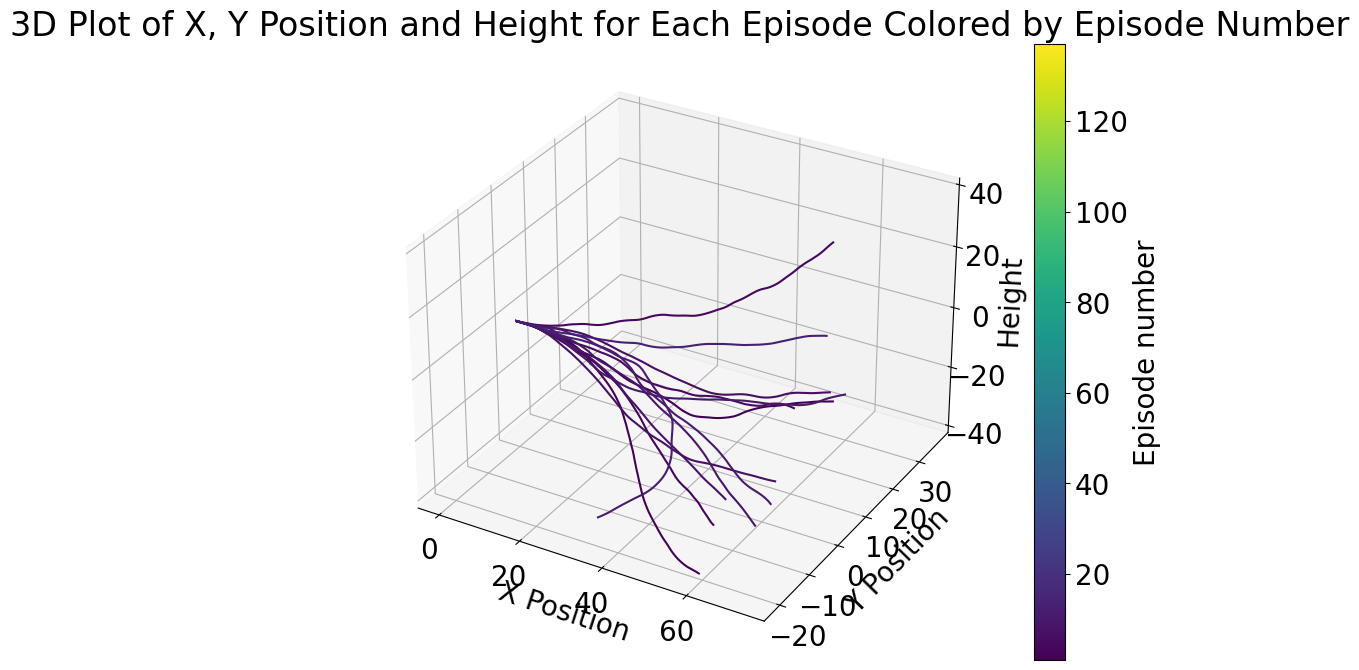

<function matplotlib.pyplot.savefig(*args, **kwargs)>

In [11]:
# Reload the dataset
# df = pd.read_csv('.csv')

# Extract unique episodes
episodes = df['episode'].unique()

# Create a colormap
cmap = plt.cm.get_cmap('viridis')

# Normalize the episodes to [0, 1] range
norm = Normalize(vmin=min(episodes), vmax=max(episodes))

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot x, y and height(-z) for each episode with color depending on the episode number
for episode in episodes:
    if episode > 13:
        continue
    df_episode = df[df['episode'] == episode]
    ax.plot(df_episode['x'], df_episode['y'], -df_episode['z'], color=cmap(norm(episode)))

ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Height')
ax.set_title('3D Plot of X, Y Position and Height for Each Episode Colored by Episode Number')

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='Episode number')

plt.show()
plt.savefig


/tmp/ipykernel_3638954/2886170167.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return plt.cm.get_cmap(colormap)(index / total_items)
/tmp/ipykernel_3638954/2886170167.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.96])


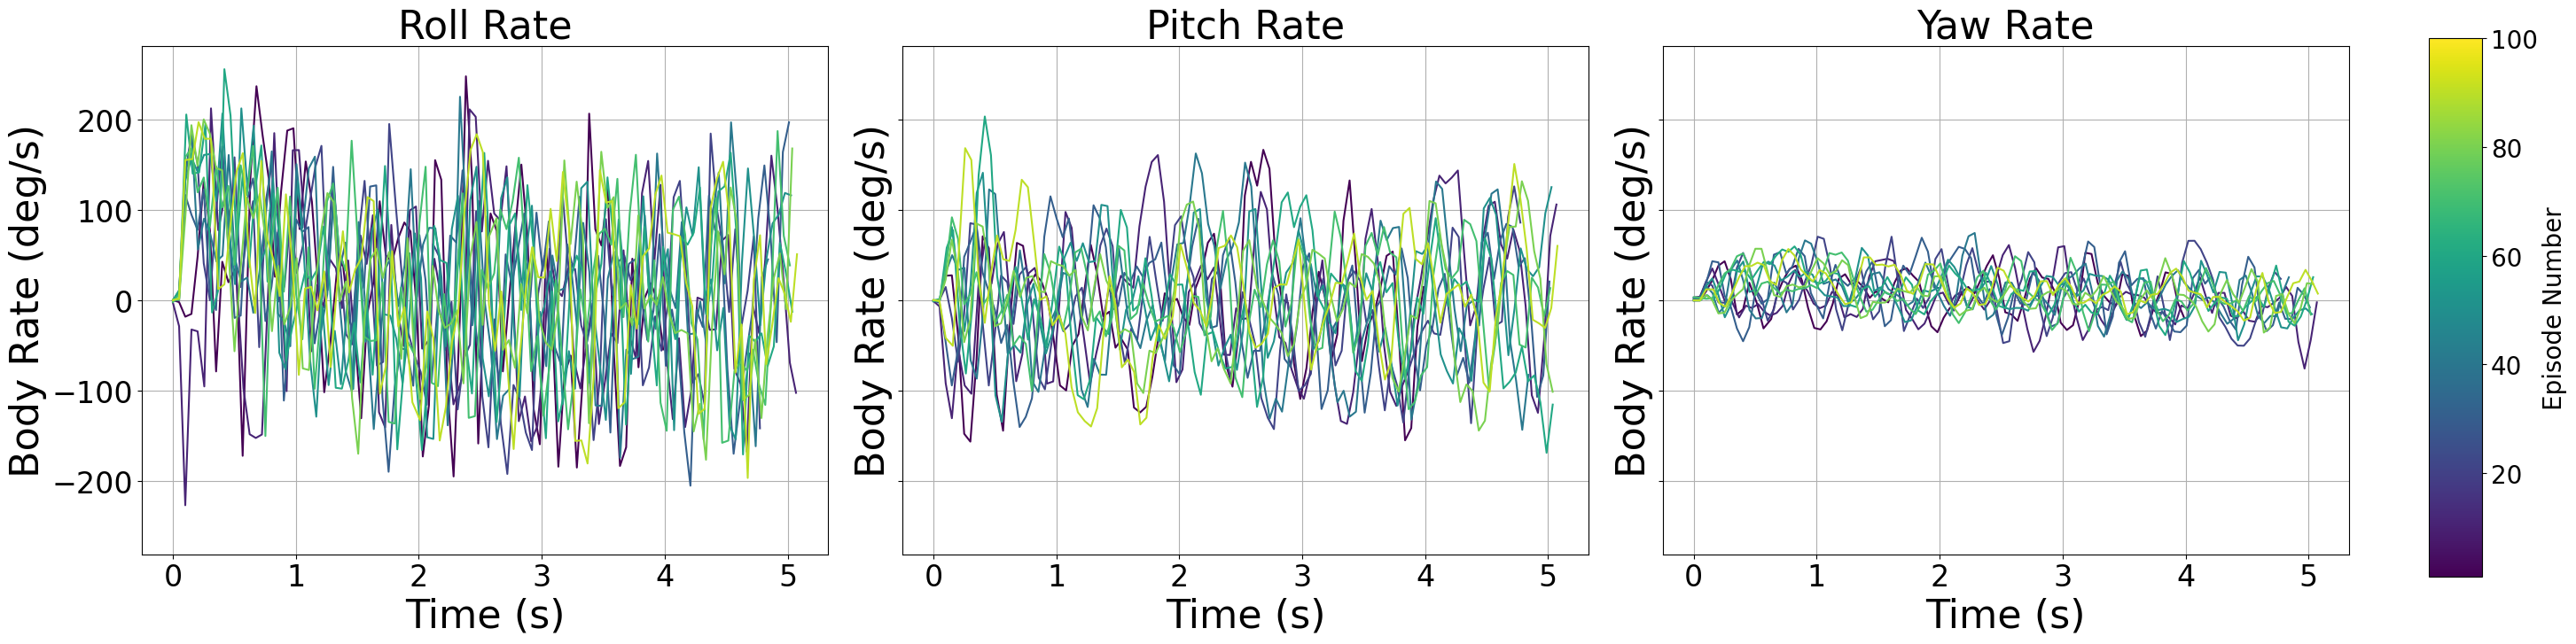

In [12]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading the CSV file
file_path = '../chap_6_data/action_space/episode_states_body.csv' # Replace with the actual path to your CSV file
data = pd.read_csv(file_path)

data['p'] = np.degrees(data['p'])
data['q'] = np.degrees(data['q'])
data['r'] = np.degrees(data['r'])

# Function to generate a color based on the current index and total number of items
def get_color(index, total_items, colormap='viridis'):
    return plt.cm.get_cmap(colormap)(index / total_items)

# Selecting 10 equally spaced episodes from episode 1 to episode 100
selected_episodes = np.linspace(1, 100, 10, dtype=int)
selected_episodes_data = data[data['episode'].isin(selected_episodes)]
selected_unique_episodes = selected_episodes_data['episode'].unique()

# Creating a plot for each body rate
fig, axes = plt.subplots(1, 3, figsize=(30, 8), sharex=True, sharey=True)
# fig.suptitle('Body Rates for 10 Equally Spaced Episodes (1 to 100)', fontsize=14)
axes[0].set_title('Roll Rate', size=32)
axes[1].set_title('Pitch Rate', size=32)
axes[2].set_title('Yaw Rate', size=32)

# global_min = min(data['p'].min(), data['q'].min(), data['r'].min())
# global_max = max(data['p'].max(), data['q'].max(), data['r'].max())

global_max_abs = max(abs(data['p']).max(), abs(data['q']).max(), abs(data['r']).max())

# Looping through each unique episode and plotting the body rates with a color gradient
for idx, episode in enumerate(selected_unique_episodes):
    episode_data = selected_episodes_data[selected_episodes_data['episode'] == episode]
    color = get_color(idx, len(selected_unique_episodes))
    axes[0].plot(episode_data['time'], episode_data['p'], color=color)
    axes[1].plot(episode_data['time'], episode_data['q'], color=color)
    axes[2].plot(episode_data['time'], episode_data['r'], color=color)

# Adding labels
for ax in axes:
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Body Rate (deg/s)')
    ax.grid(True)
    # set font size of axes labels
    ax.xaxis.label.set_size(32)
    ax.yaxis.label.set_size(32)


# Adding a colorbar to represent the episode progression without overlapping
cax = fig.add_axes([0.92, 0.12, 0.02, 0.76]) # [left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=selected_unique_episodes[0], vmax=selected_unique_episodes[-1]))
sm.set_array([])
fig.colorbar(sm, cax=cax, label='Episode Number', orientation='vertical')

# add gridlines
# for ax in axes:
    
# set font size
for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.set_ylim(-global_max_abs, global_max_abs) 




plt.tight_layout(rect=[0, 0, 0.9, 0.96])
plt.show()

#save as eps
fig.savefig('body_rates_body.eps', format='eps', dpi=1000)
